# This is the notebook used to verify, directly with Baxter robot, the results from the readout testing

To find the current IP, use: ifconfig

In [1]:
import numpy
import time
import sys
import save_load_file as slf
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
sim_set = "square" # basically is the name of the folder where the data is read/saved
base_dir = "BaxterArm_VREP_simulation_data"

./BaxterArm_VREP_simulation_data/square/joint_angles_mean_parallel_ALL_0.npy


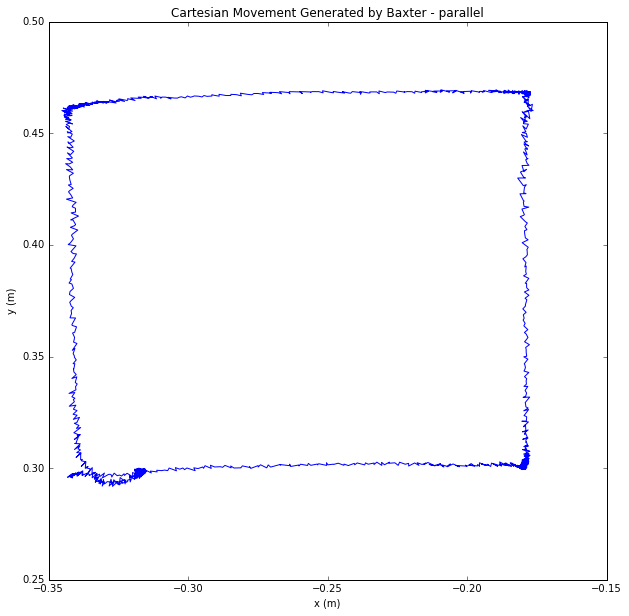

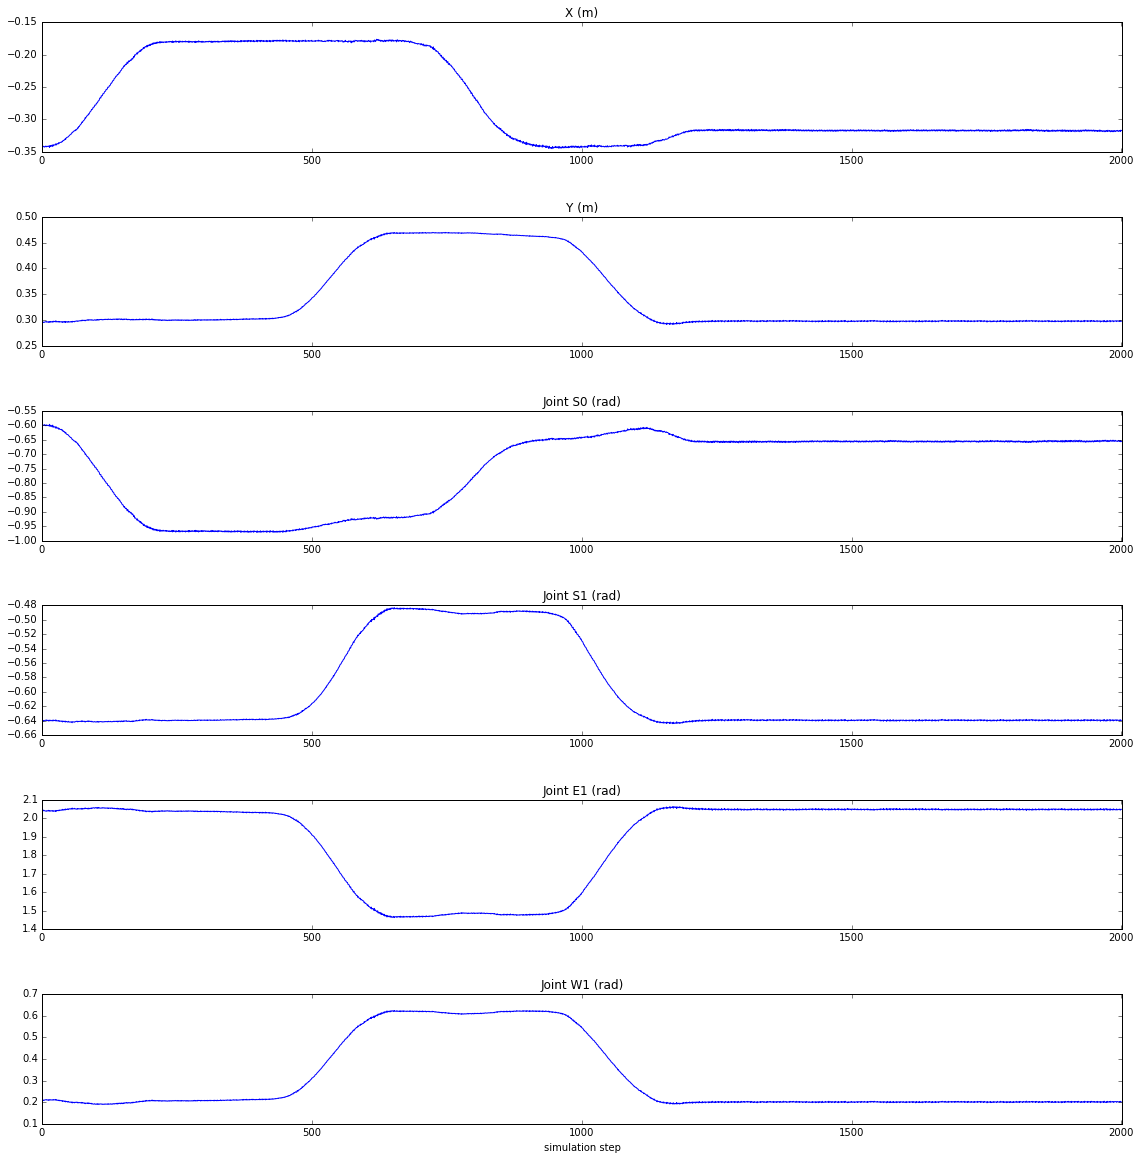

In [6]:
simulation_type = "parallel"
# simulation_type = "serial"
# simulation_type = "true_serial"

lsm_i = "ALL"
# lsm_i = 0
trial_number = 0


filename = "./"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_"+simulation_type+"_"+str(lsm_i)+"_"+str(trial_number)+".npy"
xyz_pos = numpy.load(filename)


filename = "./"+base_dir+"/"+sim_set+"/joint_angles_mean_"+simulation_type+"_"+str(lsm_i)+"_"+str(trial_number)+".npy"
joint_angles = numpy.load(filename)
print filename

plt.figure(figsize =(10,10))
plt.plot(xyz_pos[:,0],xyz_pos[:,1])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cartesian Movement Generated by Baxter - "+simulation_type)
plt.show()


fig=plt.figure(figsize =(15,20))
plt.subplot(7,1,2)
plt.plot(xyz_pos[:,0])
plt.xlim(0,len(xyz_pos))
plt.title("X (m)")

plt.subplot(7,1,3)
plt.plot(xyz_pos[:,1])
plt.xlim(0,len(xyz_pos))
plt.title("Y (m)")

plt.subplot(7,1,4)
plt.plot(joint_angles[:,0])
plt.xlim(0,len(joint_angles))
plt.title("Joint S0 (rad)")

plt.subplot(7,1,5)
plt.plot(joint_angles[:,1])
plt.xlim(0,len(joint_angles))
plt.title("Joint S1 (rad)")

plt.subplot(7,1,6)
plt.plot(joint_angles[:,2])
plt.xlim(0,len(joint_angles))
plt.title("Joint E1 (rad)")

plt.subplot(7,1,7)
plt.plot(joint_angles[:,3])
plt.xlim(0,len(joint_angles))
plt.title("Joint W1 (rad)")

plt.xlabel("simulation step")

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
plt.show()


In [31]:
import socket
import time
import numpy


def send_UDP(IP, PORT, data):
    """
    This is a very light weight function to send data using UDP.
    To send a numpy.array, use this:
    array_name.tobytes()
    
    and the receiving port should do:
    numpy.frombuffer(data)
    """
    sockO = (socket.socket(socket.AF_INET,     # IP
                           socket.SOCK_DGRAM)) # UDP
    try:
        sockO.sendto(data, (IP, PORT)) # here it is being supposed the pipe has the final string
                                                  # the method .recv() is a blocking command

    except IOError: # Without the IOError even the keyboard "control+C" is caught here!
        print "IO error?"

In [149]:
temp = numpy.zeros(7,dtype=numpy.float64)
temp[6]=-.2
for ji in [joint_angles[0]]:
    temp[[0,1,3,5]]=ji
    send_UDP("141.163.173.246", 8888, temp.tobytes())
    time.sleep(25E-3)

In [150]:
temp = numpy.zeros(7,dtype=numpy.float64)
temp[6]=-.2
for ji in joint_angles:
    temp[[0,1,3,5]]=ji
    send_UDP("141.163.173.246", 8888, temp.tobytes())
    time.sleep(25E-3)

In [126]:
for i in range(10):
    trial_number = i


    filename = "../"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_"+simulation_type+"_"+str(lsm_i)+"_"+str(trial_number)+".npy"
    xyz_pos = numpy.load(filename)

    print i,xyz_pos[0,2]-xyz_pos[:,2].min()
    print i,xyz_pos[0,2]-xyz_pos[:,2].max()

0 0.000928282737732
0 -0.00046306848526
1 0.000588059425354
1 -0.000256538391113
2 0.000909984111786
2 -0.000632345676422
3 0.000943720340729
3 -0.000515401363373
4 0.000974118709564
4 -0.000754714012146
5 0.00111699104309
5 -0.000587463378906
6 0.00104415416718
6 -0.000814139842987
7 0.000973343849182
7 -0.000486671924591
8 0.00095796585083
8 -0.000610172748566
9 0.000901639461517
9 -0.000762641429901
